In [91]:
from torchvision import models

In [92]:
alexnet = models.AlexNet

### 활성화 함수
- Relu (렐루)
    - 입력값이 0보다 크면 → 그대로 출력
    - 입력값이 0 이하이면 → 0으로 
    => 기울기 소실 문제를 해결함/ 기울기를 1로 유지시켜 역전파가 끊기지 않도록 도와줌

### ResNet-101
#### ResNet-101의 핵심 아이디어인 '스킵커넥션'

- 일반 CNN(합성곱 신경망) 을 계속 깊에 쌓으면 층이 깊을수록 학습이 더 잘 되어야 하는 데 실제로는 오차가 커지는 현상이 생김  
    -> 이것을 해결하기 위해 고안된 것이 Residual Learning (잔차 학습)  
         => 전체 함수를 다 학습하려고 하지 말고 입력에서 얼마나 바뀌었는지만 학습하자! 는 것이 핵심  

In [ ]:
# ReNet-101
# 스킵커넥션 (Skip Connection, Residual Block):
# W.x 학습대신에 f(x) 잔차(resudial)(입력x와의 차이)만 학습
# 초기 x의 값이 지름길을 통해 뒤쪽 레이어까지 직접 전달. 층이 깊을수록 기울기가 소실되는 문제
# 100층이 넘어가면 기울기가 소실되거나 폭발하는 현상이 필연적이었으나 스킵커넥션 이후 가능해짐
# H(x) = F(x) + x
resnet = models.resnet101(pretrained = False)
                        # pretrained=False ->  ImageNet으로 학습된 가중치를 사용하지 않음 → 처음부터 학습


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [94]:
# from PIL import Image
# img = Image.open('')        # '' 에 이미지를 가져오면 이미지가 오픈됨

In [66]:
# alexnet.eval() 모델을 평가할 때 평가모드로 전환
# 모델 내의 배치 정규화 층, 드랍아웃 층이 평가모드로 작동
# 배치정규화 : 학습에는 현재 배치의 평균과 분산을 사용/ 평가모드가 되면 학습고정 전체에서 누적된 평균 분산을 사용
# 드랍아웃 : 학습 시에는 랜덤하게 뉴런은 끄지만(비활성화), 평가모드로 전환되면 모든 뉴런을 사용
# alexnet(x_test) 예측

#### CNN(합성곱)

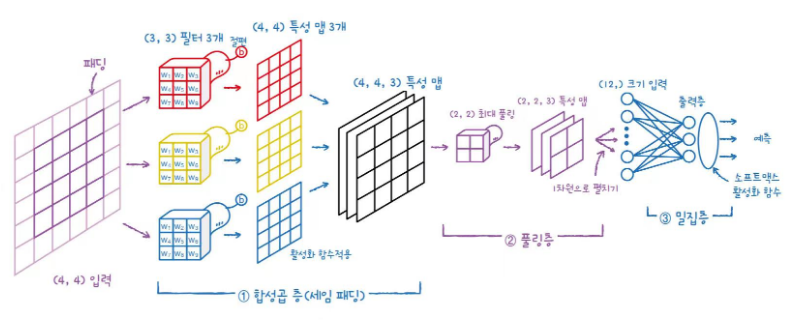

- CNN은 이미지를 한 번에 통째로 보는 대신, 작은 영역을 반복적으로 '잘라서' 특징을 추출하고, 그 결과를 '요약'하여 크기를 줄이는 계층적인 방식으로 학습. 이는 특징의 재사용성을 높이고, 이미지의 위치나 크기 변화에도 강인하게 대응  
- 패딩(Padding): 특징 맵의 크기가 줄어드는 것을 방지하고 가장자리 정보 손실을 막기 위해

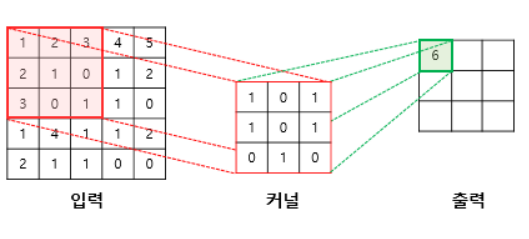

- 합성곱 연산 -> 이미지의 특징을 추출
- convolution - CNN
- (28,28,3) (너비, 높이, 깊이(채널))  3차원 텐서
- 커널은 일반적으로 3x3, 5x5를 많이 사용
- 5x5 이미지 3x3커널

---

In [95]:
import torch
import torch.nn as nn

# 배치크기 x 채널크기 x 높이 x 너비     # 배치크기 -> 샘플의 개수
inputs = torch.Tensor(1,1,28,28)  # 28x28 크기를 갖는 한개의 흑백 이미지. 1은 보통 흑백
print(f'텐서의 크기 : {inputs.size()}')

텐서의 크기 : torch.Size([1, 1, 28, 28])


In [96]:
# 합성곱층과 풀링선언
conv1 = nn.Conv2d(1,32,3,padding = 1)       # 특성맵을 출력 stride 1 padding=1 28x28이 32개
print(conv1)        # 1 : 입력 데이터의 채널의 수
                    # 32 : 출력 데이터의 채널의 수
                    # 3 : 필터(커널)의 크기, 즉 3x3
                    # padding = 1 : 가장자리에 하나씩, 즉 하나씩 전체를 감싸준다
                    # stride : 필터(Filter)나 커널(Kernel)이 입력 데이터 위를 이동할 때 얼마나 움직일지를 설정

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [97]:
# 2번째 합성곱층
conv2 = nn.Conv2d(32,64,3,padding = 1)      # 2번쨰 합성곱층의 입력 데이터는 1번째 합성곱층의 출력 데이터와 개수가 맞아야 한다.


In [98]:
# 2x2의 풀링층을 만든다
pool = nn.MaxPool2d(2)  # MaxPooling은 특징 맵(feature map)의 크기를 줄이면서 중요한 정보만 뽑아내는 역할
print(pool)             # 2는 커널 크기 2x2 (보통 정사각형으로 하기 떄문에 2만 넣어도 2x2라는 것을 알 수 있다)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [99]:
# 데이터 통과하기
out = conv1(inputs)     # 샘플이미지(inputs)dmf conv1(첫번쨰 합성곱층)에 넣어 아웃 변수로
out.size()

torch.Size([1, 32, 28, 28])

In [100]:
out = pool(out)     # 만든 풀링층에 데이터를 넣는다
print(out.size())

torch.Size([1, 32, 14, 14])


In [101]:
out = conv2(out)    # 샘플이미지(inputs)dmf conv2(두번쨰 합성곱층)에 넣어 아웃 변수
print(out.size())

torch.Size([1, 64, 14, 14])


In [102]:
out = pool(out)
print(out.size())

torch.Size([1, 64, 7, 7])


In [103]:
out = out.view(out.size(0),-1)  # out.size() -> 현재 out 텐서의 모든 차원 크기를 튜플 형태로 반환/ -1는 나머지 차원들의 크기를 자동으로 계산
print(out.size())               # 인풋의 모양이 inputs = torch.Tensor(1,1,28,28)인데 첫번째것이 배치의 크기이기 때문에 size(0)으로 넣어서 배치의 크기를 뽑아낸다

torch.Size([1, 3136])


In [104]:
fc = nn.Linear(3136,10)     # 3136은 보통 이전의 합성곱/풀링 계층을 거쳐 나온 다차원 특징 맵(Feature Map)을 1차원 벡터로 펼쳤을 때(Flatten)의 크기
out = fc(out)               # 데이터를 fc 계층에 통과시키는 과정/ out 데이터가 fc 계층을 통과하면서, 내부의 가중치(Weight)와 곱해지고 편향(Bias)이 더해지는 선형 변환을 거친다
print(out.size())

torch.Size([1, 10])


#### 활성화함수

In [105]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

In [ ]:
# C,H,W # Channel (채널),Height (높이),Width (너비)
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data',train = True, download=True, transform= transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data',train = False, download=True, transform= transform)
train_loader = DataLoader(train_dataset,batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64, shuffle= False)

In [107]:
train_dataset       # train_dataset 정보

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
import numpy as np
for data in train_dataset:
    print(data[0].size())   # torch.Size([1, 28, 28]) data 정보/ 흑백이며 28x28 사이즈
    break

torch.Size([1, 28, 28])


In [109]:
for data in train_loader:
    print(data[0].size())       # torch.Size([64, 1, 28, 28])-> 64개의 데이터 학습
    break

torch.Size([64, 1, 28, 28])


In [ ]:
# 클래스 만들기
import torch.nn as nn

# 1. CNN 모델 클래스 정의
class CNN(nn.Module):                                 # 클래스 불러오기
    def __init__(self):                               # 클래스 변수 선언
        super(CNN,self).__init__()                    # 자식 클래스(CNN)를 초기화하기 전에, 먼저 부모 클래스(nn.Module)의 초기화 작업을 실행   # 64 1 28 28 
        # 합성곱 블록 1
        self.conv1 = nn.Conv2d(1,32,3,padding=1)      # 32는 보편적으로 많이 쓰는거 (입력 데이터 채널 수, 출력 데이터의 채널 수 , 필터(커널)의 크기)/ 입력: (1, 28, 28)-> 출력(32,28,28)
        # 합성곱 블록 2 
        self.conv2 = nn.Conv2d(32,64,3,padding=1)    # (64, 14, 14)
        # 풀링 계층 (공용으로 사용)       
        self.pool = nn.MaxPool2d(2)         # 2X2는 가로/세로를절반으로 줄인다 (32, 28, 28) → (32, 14, 14)/ 2번째 실행시 (64, 14, 14) → (64, 7, 7)
        # 완전 연결 계층 (분류기)       
        self.fc1 = nn.Linear( 64*7*7,128)           # 합성곱 + 풀링을 두 번 거친 결과는 채널-64 높이-7 너비-7 / 출력 뉴런 수: 128개 (이건 사람이 임의로 정하는 “은닉층 노드 수”)
        self.fc2 = nn.Linear(128,10)                # 128은 fc1에서 받는 데이터 개수/ 10은 최종 분류할 클래스 개수. 분류하는 유니크의 종류가 열개

    # 2. 데이터의 흐름(순전파) 정의
    def forward(self,x):  
        # 첫 번째 합성곱 블록 통과
        # (Batch, 1, 28, 28) -> Conv1 -> (Batch, 32, 28, 28) -> ReLU -> Pool -> (Batch, 32, 14, 14)
        x = self.pool(F.relu(self.conv1(x)))                                            # 64 1 28 28 - > 64 32 14 14
        # 두 번째 합성곱 블록 통과
        # (Batch, 32, 14, 14) -> Conv2 -> (Batch, 64, 14, 14) -> ReLU -> Pool -> (Batch, 64, 7, 7)
        x = self.pool(F.relu(self.conv2(x)))                                            # 64 32 14 14 -> 64 64 7 7
        x = x.view(x.size(0),-1)
        # 4. 완전 연결 계층 통과
        x = F.relu(self.fc1(x))
        out = self.fc2(x)
        return out
# 5. 모델 객체 생성   
model = CNN()
# 6. 장치 설정 (GPU 또는 CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# 7. 손실 함수 정의
criterion = nn.CrossEntropyLoss() # 손실함수 내부에 소프트맥스 + 로그손실게산 다증 클래스 계산
# 8. 옵티마이저 정의
optimizer = optim.Adam(model.parameters(), lr = 0.001)


In [144]:
len(train_loader)

938

In [ ]:

# 훈련 루프
from tqdm import tqdm
# 총 에포크 에포크는 전체 훈련 데이터셋을 처음부터 끝까지 한 번 학습하는 것
num_epochs = 5      # 즉 5번 학습
# 바깥쪽 루프: 에포크 단위 반복
for epoch in range(num_epochs):
    # 훈련모드로 전환
    model.train()  # 롭아웃이나 배치 정규화와 같이 훈련할 때와 평가할 때 다르게 동작하는 계층들을 활성화시키는 역할
    # 한 에포크의 손실을 기록하기 위한 변수 초기화
    running_loss = 0.0  # 에포크가 끝난 후 평균 손실을 계산하는 데 사용
    # 안쪽 루프: 배치(Batch) 단위 반복
    for inputs,labels in  tqdm(train_loader): # 이 루프는 train_loader로부터 한 배치 분량의 이미지 데이터(inputs)와 그에 해당하는 정답(labels)을 받아와서 반복 실행
        # 데이터와 정답을 지정된 장치(GPU/CPU)로 이동
        inputs,labels = inputs.to(device), labels.to(device)    # 모델과 데이터가 같은 장치에 있어야 연산이 가능
        # 그레디언트 초기화/ 그래디언트: 특정 지점에서 함수 값이 가장 가파르게 증가하는 방향을 나타내는 벡터(화살표)
        optimizer.zero_grad()  # PyTorch는 기본적으로 그래디언트를 계속 누적시키기 때문에, 새로운 배치를 처리하기 전에 이전 배치의 그래디언트 값을 0으로 깨끗하게 지워야함
        # 순전파(forward pass) 모델 예측
        outputs = model(inputs)  # 이미지 데이터(inputs)를 모델에 입력하여 예측값(outputs)을 얻고,  CNN 클래스에 정의된 forward 메소드가 자동으로 호출
        # 손실계산단계 
        loss = criterion(outputs,labels) # 모델의 예측값(outputs)과 실제 정답(labels)을 손실 함수(criterion, 즉 CrossEntropyLoss)에 넣어 오차, 즉 손실(loss) 값을 계산/ 값이 낮을 수록 모델이 정답을 잘 맞춘것
        # 역전파(그레이던트 계산)
        loss.backward()  # 계산된 손실(loss)을 기준으로, 모델의 각 파라미터(가중치)가 이 손실에 얼마나 영향을 미쳤는지를 계산
        # 파라메터(가중치)를 업데이트
        optimizer.step() # 옵티마이저(optimizer, 즉 Adam)가 loss.backward()로 계산된 그래디언트 값을 사용하여 모델의 파라미터(가중치)를 수정
        # 손실 값 누적
        running_loss += loss.item() # 현재 배치의 손실 값(loss.item())을 running_loss에 더해줌
    print(f'Epoch : {epoch+1}/{num_epochs}, Loss : {running_loss / len(train_loader):.4f} ')

100%|██████████| 938/938 [01:02<00:00, 14.95it/s]


Epoch : 1/5, Loss : 0.4336 


100%|██████████| 938/938 [01:26<00:00, 10.84it/s]


Epoch : 2/5, Loss : 0.2813 


100%|██████████| 938/938 [02:00<00:00,  7.79it/s]


Epoch : 3/5, Loss : 0.2333 


100%|██████████| 938/938 [02:01<00:00,  7.70it/s]


Epoch : 4/5, Loss : 0.2021 


100%|██████████| 938/938 [01:32<00:00, 10.12it/s]

Epoch : 5/5, Loss : 0.1765 


In [ ]:
# 평가
# 평가모드 전환
model.eval()       # 드롭아웃(Dropout)이나 배치 정규화(Batch Normalization) 같은 계층들을 비활성화하여 일관된 예측 결과를 얻기 위해 반드시 필요
correct = 0
total = 0

# 그래디언트 계산 비활성화 (메모리 절약)
with torch.no_grad(): # 평가 단계에서는 모델의 가중치를 업데이트하지 않으므로, 그래디언트를 계산할 필요가 없음
    for inputs, labels in test_loader: # 평가 데이터 로더(test_loader)로부터 한 배치(batch) 분량의 테스트 이미지(inputs)와 해당 정답(labels)을 순서대로 가져와 루프를 실행
        inputs, labels = inputs.to(device), labels.to(device)   # 훈련 루프와 마찬가지로, 평가할 데이터도 모델이 있는 장치(GPU 또는 CPU)로 보냄
        output = model(inputs)      # 순전파단계/ 테스트 이미지(inputs)를 모델에 입력하여 예측 결과(outputs)를 얻는다
        _, predicted = torch.max(output.data, 1)   # 최대 확률 클래스 예측
        total += labels.size(0) # 현재 배치의 이미지 개수(labels.size(0))를 total에 더하여 전체 이미지 수를 누적
        correct += (predicted == labels).sum().item()       # 정확하게 예측한 개수를 세는 부분
print(f'test accuracy :{(correct / total):.4f}')

test accuracy :0.9142


In [ ]:
test_data = next(iter(test_loader))[0] # iter(test_loader): test_loader를 반복 가능한 객체(iterator)로 만든다
_, predicted = torch.max(model(test_data),1)
_, predicted

X,y = next(iter(test_loader))
_, predicted = torch.max(model(X),1)
predicted[:5],y[:5],predicted[:-5],y[:-5]


(tensor([9, 2, 1, 1, 0]),
 tensor([9, 2, 1, 1, 6]),
 tensor([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
         1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1,
         2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
         1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
         2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8]))

## 컬러이미지 C3

### RGB 채널의 각각의 평균과 표준편차

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])     #  transforms.ToTensor() 이미지 데이터를 파이토치가 처리할 수 있는 텐서 형태로 변환
test = torchvision.datasets.CIFAR10(root='./data',train = True, download=True, transform= transform)

mean = torch.zeros(3)    # 평균과 표준편차 값을 누적해서 더하기 위한 텐서를 생성
std = torch.zeros(3)    
                         #  크기가 3인 텐서를 0으로 채워서 만듭니다. 크기가 3인 이유는 컬러 이미지의 R, G, B 세 채널에 대한 값을 각각 저장하기 위함
for data, _ in test:
    mean += data.mean(dim=(1,2))  #  각 이미지의 채널별(R, G, B) 평균을 구한 뒤, mean 텐서에 계속 더해나감/ dim=(1, 2)는 높이와 너비 차원에 대해 평균을 계산하라는 의미
    std += data.std(dim=(1,2))    #  채널별 표준편차를 구하여 std 텐서에 더한다
print(mean/len(test))
print(std/len(test))



Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2023, 0.1994, 0.2010])


->  위 흑백이미지 코드와 정규화가 다름  
  -> 정리는 노션에

In [177]:
(mean / len(test)).cpu().numpy()

array([0.4914008 , 0.482159  , 0.44653094], dtype=float32)

### 학습/검증/테스트 데이터 로더

In [ ]:
# 1. 최종 이미지 변환(Transform) 정의
rgb_mean = mean / len(test)
rgb_std = std / len(test)
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize(rgb_mean, rgb_std)])
# 2. 전체 훈련/테스트 데이터셋 로드
full_train_dataset = torchvision.datasets.CIFAR10(root='./data',train = True, 
                                  download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data',train = False, 
                                  download=True, transform=transform)
# 3. 훈련/검증 데이터셋 분할
# train/val 분할 : 8:2
from torch.utils.data import random_split

train_size = int(len(full_train_dataset)*0.8)
val_size = len(full_train_dataset) - train_size
train_dataset , val_dataset =  random_split(full_train_dataset, [train_size,val_size] )

# 4. 데이터 로더(DataLoader) 생성
train_loader =  DataLoader(train_dataset, batch_size=128,shuffle=True)
test_loader =  DataLoader(test_dataset, batch_size=128,shuffle=False)
val_loader =  DataLoader(val_dataset, batch_size=128,shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


### 컬러이미지 처리 CNN 모델 구현
- 손실함수
- 옵티마이저
- 스케줄러

In [ ]:
# 모델클래스
# 손실함수
# 역전파를 위한 옵티마이져
# 학습루프
# 평가
# 예측

In [230]:
train_dataset

In [182]:
import numpy as np
for data in train_dataset:
    print(data[0].size())  
    break

torch.Size([3, 32, 32])


In [ ]:
# 1. 모델 클래스 정의
import torch.nn as nn
class CNN_CIFAR10(nn.Module):
# 2. 모델의 구성 요소 (레이어)초기화
    def __init__(self):                      # 이 클래스의 생성자 함수
        super(CNN_CIFAR10, self).__init__()  # 부모클래서 생성자 호출 64 3 32 32
        # 첫번째 합성곱 레이어
        self.conv1 = nn.Conv2d(3,32,3,padding=1)   # 컬러 이미지(R, G, B 채널 3개)/ 출력 채널 수.32개의 특징 맵(feature map)을 생성/ 3x3 크기의 필터(커널)
        # 두번재 합성곱 레이어
        self.conv2 = nn.Conv2d(32,64,3,padding=1) # 32개의 채널을 입력 받아 64개의 특징 맵 생성
        # 맥스 풀링 레이어 정의
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear( 64*8*8, 128) # 64*8*8 -> 입력 뉴런 수. 이전 풀링 레이어에서 나온 64개의 8x8 크기 특징 맵을 1차원 벡터로 펼친 크기/ 출력 뉴런 수는 128개
        self.fc2 = nn.Linear(128 , 10)     # : 최종 출력을 위한 두 번째 완전 연결 레이어
    # 3. 데이터의 흐름(순전파)정의
    def forward(self,x):  
        x = self.pool(F.relu(self.conv1(x)))  # (64,3,32,32)  -> (64,32,16,16) # 입력 x가 conv1 레이어를 통과하고, 비선형성을 추가하기 위해 ReLU 활성화 함수를 거친 뒤, pool 레이어를 통과하여 크기가 절반으로 줄어든다
        x = self.pool(F.relu(self.conv2(x)))  # (64,32,16,16)  -> (64,64,8,8)
        x = x.view(x.size(0),-1)        # 3차원 특징 맵(채널, 높이, 너비)을 완전 연결 레이어에 입력하기 위해 1차원 벡터로 펼치는(flatten) 과정
        x = F.relu(self.fc1(x))         # 펼쳐진 벡터가 fc1 레이어를 통과하고 ReLU 활성화 함수를 거친친다
        out = self.fc2(x)               #  마지막으로 fc2 레이어를 통과하여 10개의 클래스에 대한 최종 점수가 out에 저장
        return out
# 4. 학습 환경 설정
cnn_cifar10_model = CNN_CIFAR10()
device = torch.device('cuda'  if torch.cuda.is_available() else 'cpu')
cnn_cifar10_model.to(device)        # 생성된 모델의 모든 파라미터(가중치, 편향)를 device에서 지정한 장치(GPU 또는 CPU)로 보낸다
criterion = nn.CrossEntropyLoss()   # 손실 함수(Loss Function)를 정의 # 다중 클래스 분류 문제에 널리 사용되며, 내부에 Softmax 함수가 포함되어 있어 모델의 마지막에 별도로 Softmax를 추가할 필요가 없음
optimizer = optim.Adam(cnn_cifar10_model.parameters(), lr = 0.001)      # 학습률(Learning Rate)**을 0.001로 설정. 학습률은 가중치를 얼마나 크게 업데이트할지 결정하는 하이퍼파라미터
scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=7, gamma=0.1)  # 매 7에포크 lr*0.1  # 학습률 스케줄러를 정의. 학습 과정 중에 학습률을 동적으로 조절하는 역할/ step_size=7: 7 에포크(epoch)마다 학습률을 변경/ 

### EarlyStopping
- 모델이 과적합(overfitting) 되기 전에 훈련을 자동으로 멈추는 기법


In [ ]:
class EarlyStopping:
    # 클래스 초기화
    def __init__(self,patience=5, min_delta = 0):   # patience=5 검증 손실이 개선되지 않더라도 5 에포크까지는 학습을 계속 지켜보겠다는 뜻/ min_delta=0: 개선되었다고 판단하기 위한 최소 변화량
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0        # 성능이 개선되지 않은 에포크의 횟수를 세는 카운터
        self.best_loss = float('inf') # 지금까지 관찰된 가장 낮은 검증 손실 값을 저장하는 변수. inf (무한대)로 초기화하여 첫 번째 에포크의 검증 손실이 항상 best_loss로 기록
    # 매 에포크마다 성능 확인 (호출 시 동작)
    def __call__(self, val_loss):       # 현재 에포크의 검증 손실(val_loss)**을 인자로 받아 호출
        if val_loss < self.best_loss - self.min_delta:      # 현재 검증 손실(val_loss)이 기록된 최저 손실(self.best_loss)보다 작으면, 성능이 개선된 것
            self.best_loss = val_loss       # 최저 손실을 현재 값으로 업데이트
            self.counter = 0        # 성능이 개선되었으므로 "인내심" 카운터를 0으로 리셋
        else: # 개선되지 않은 경우
            self.counter += 1       # 성능이 개선되지 않았으므로 카운터를 1 증가
            if self.counter >= self.patience:   # patience(여기서는 5)에 도달하거나 초과하면, 중단
                return True  # 조기종류
        return False
# 실제 사용
early_stopping = EarlyStopping()

In [ ]:
### 훈련/ 검증 함수 (accurary 포함)

# 함수 정의 및 초기 설정
from tqdm import tqdm
def train_epoch(model, loader, criterion, optimizer, device): # model(훈련시킬 모델), loader(데이터를 공급하는 DataLoader), criterion(손실 함수), optimizer(옵티마이저), device(연산 장치, 'cpu' 또는 'cuda')
    # 모델을 훈련 모드로 설정
    model.train()  # 드랍아웃, 배치노말.. 기능성 레이어(층) 활성화
    running_loss = 0.0 # 에포크 동안의 총 손실 누적 초기화
    correct = 0        # 맞춘 예측 개수 누적 초기화
    total = 0          # 전체 데이터 개수 누적 최기화
    # 데이터 로더 순회 및 진행률 표시줄 설정
    iterator =  tqdm(enumerate(loader),total = len(loader),desc='Train'  )  # enumerate(loader): 데이터 로더에서 (배치 인덱스, 데이터) 쌍을 가져온다
    for batch_idx, (inputs, labels) in iterator:   # iterator를 통해 한 번에 한 배치(batch) 만큼의 데이터(inputs)와 정답(labels)을 가져와 루프를 실행
        # 단일 배치 훈련             
        inputs,labels =  inputs.to(device), labels.to(device) # 현재 배치의 데이터와 정답을 지정된 device(GPU 또는 CPU)로 보낸다
        optimizer.zero_grad() # 그레디언트 초기화(기울기(gradient) 초기화)
        outputs = model(inputs)  # 순전파 forward 호출 --> 예측
        loss = criterion(outputs,labels) # 손실계산/ 모델의 예측값과 실제 정답을 손실 함수(criterion)에 넣어 오차(손실)를 계산
        loss.backward()  # 역전파(그레이던트 계산)/ 계산된 손실을 바탕으로 모델의 각 파라미터(가중치)에 대한 기울기를 계산
        optimizer.step() # 파라메터(가중치)를 업데이트
        # 성능 지표 계산 및 기록
        running_loss += loss.item()  # 현재 배치의 손실 값을 running_loss에 더해준다/ .item()은 텐서에서 숫자 값만 추출하는 메소드

        _,predicted =  torch.max(outputs.data,1) # 모델의 예측값(outputs)에서 가장 높은 점수를 가진 클래스의 인덱스를 predicted에 저장/ 모델이 예측한 최종 클래스
        total += labels.size(0)     # 현재 배치의 데이터 개수를 total에 합산
        correct += (predicted == labels).sum().item()  # 계산그래프에서 빠짐..# 모델의 예측(predicted)과 실제 정답(labels)이 일치하는 개수를 세어 correct에 더합
        iterator.set_postfix({'loss' : f'{loss.item():.3f}',
                             'acc':f'{correct/total:.3f}'})
    #에포크 결과 반환
    avg_loss = running_loss / len(loader)  #  누적된 running_loss를 전체 배치의 수(len(loader))로 나누어 평균 손실을 구한다
    accuracy = correct / total          # 맞춘 예측의 총합(correct)을 전체 데이터 수(total)로 나누어 전체 정확도를 구한다
    return avg_loss,accuracy        # 계산된 평균 손실과 정확도를 반환

In [ ]:
# 훈련 루프
# 총 에포크 에포크는 전체 훈련 데이터셋을 처음부터 끝까지 한 번 학습하는 것
num_epochs = 20     # 훈련을 최대 20 에포크까지 진행
best_val_loss = float('inf')    # 가장 좋았던 검증 손실(validation loss)을 기록하기 위한 변수/ inf (무한대)로 초기화하여 첫 번째 에포크의 손실 값이 항상 더 좋게(작게) 기록
for epoch in range(num_epochs):
    train_loss, train_acc =  train_epoch(cnn_cifar10_model,train_loader,criterion,optimizer,device) # 이전에 정의한 train_epoch 함수를 호출하여 모델을 1 에포크 동안 훈련 # 함수가 종료되면 해당 에포크의 평균 훈련 손실(train_loss)과 훈련 정확도(train_acc)를 반환
    scheduler.step() # 스케줄러 업데이트    # 1 에포크의 훈련이 끝난 후, 학습률 스케줄러의 step() 함수를 호출. 미리 정의된 규칙(예: 7 에포크마다 학습률을 0.1배로 감소)에 따라 학습률을 조절
    
    # early stoppin check
    if early_stopping(best_val_loss):
        print(f'Early Stopping epoch : {epoch+1}')
        break


Train: 100%|██████████| 313/313 [01:07<00:00,  4.64it/s, loss=0.640, acc=0.765]

Early Stopping epoch : 5
